In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

dataset_path = 'Training.csv'
smooth_path = 'Training_smooth21.csv'

avgwin = 21

2.7.0


In [2]:
dataset = pd.read_csv(dataset_path)
print(dataset.shape)
dataset.head()

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.97698,4.33494,10.67282,1.76692,3.22440,51.681460,3.65434
1,8.07824,4.44616,10.56160,1.70716,3.32566,51.563598,3.47672
2,8.02844,4.22372,10.56160,1.64906,3.17460,50.863080,3.47672
3,8.02844,4.22372,10.56160,1.70716,3.17460,45.841581,3.47672
4,7.87572,4.44616,10.45038,1.70716,3.27586,47.126421,3.47672


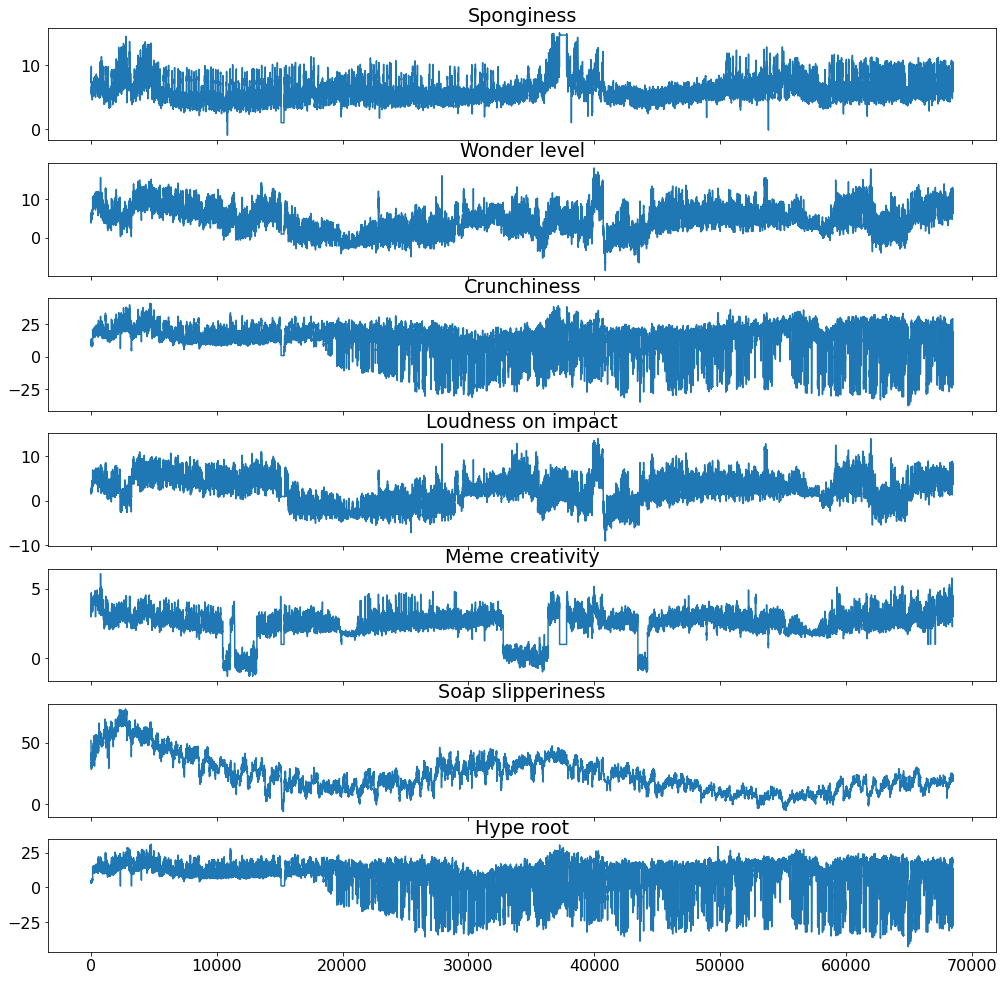

In [3]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(dataset, dataset.columns)

In [4]:
data = dataset.values
data.shape

(68528, 7)

In [5]:
data_smooth = np.zeros(shape=data.shape)
a = int(np.floor(avgwin / 2))
tmp = np.array(0)
for j, x in enumerate(data.T):  # x is every one of the 7 timeseries
    print(j)
    for k, s in enumerate(x):  # s is every point of the single time serie
        sum = 0
        count = 0
        if k < a:
            tmp = x[: (a + k + 1)]
        elif x.size - k <= a:
            tmp = x[-(x.size - k + a) :]
        else:
            tmp = x[k - a : k + a + 1]
        if (tmp == np.ones(shape=tmp.shape)).all():
            sum = 1
            count = 1
            # print("error") 
            # this happens when all points in the window are ones
            # it would be nice to implement for the moment something like picking a wider window
            # but for now i'm leaving them as ones
        for x1 in tmp:
            if x1 != 1:
                sum = sum + x1
                count = count + 1
        data_smooth[k, j] = sum / count


0
1
2
3
4
5
6


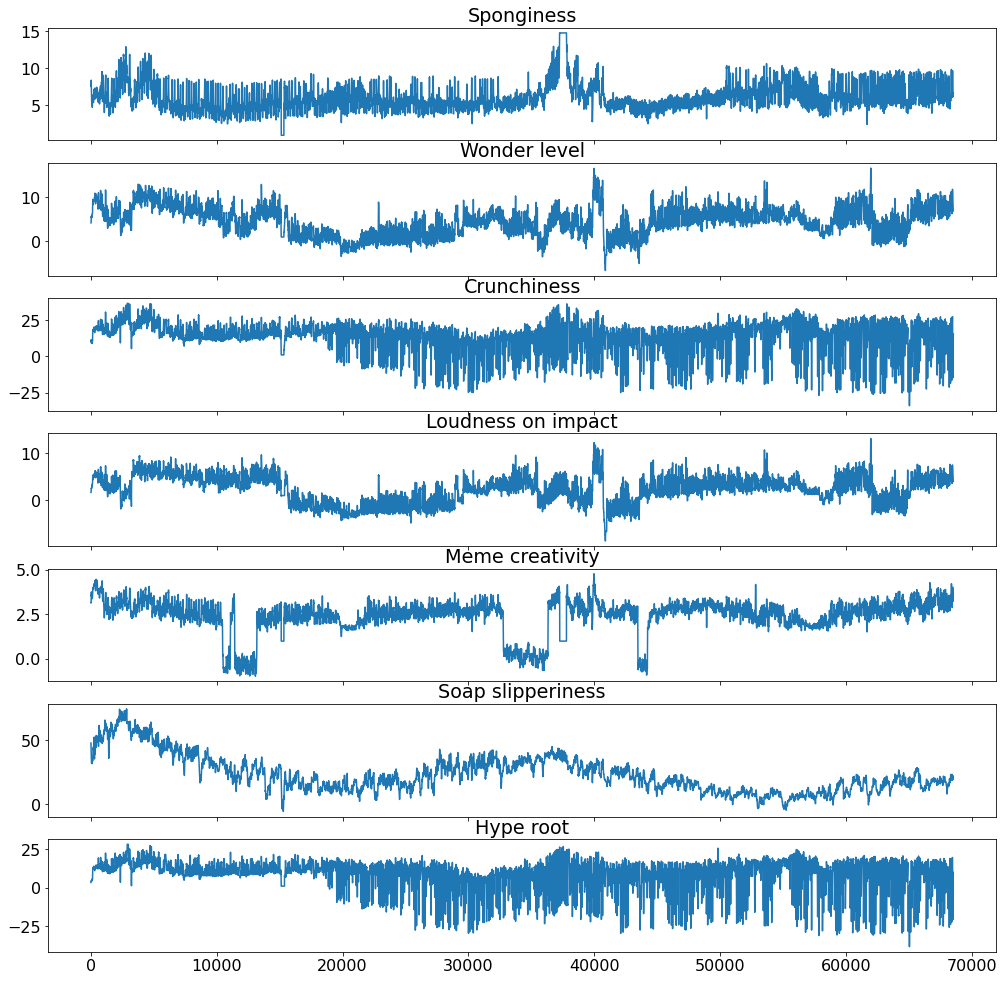

In [6]:
dataframe_smooth = pd.DataFrame(data_smooth, columns = dataset.columns)
inspect_dataframe(dataframe_smooth, dataframe_smooth.columns)

In [7]:
dataframe_smooth.to_csv(smooth_path, index=False)